In [29]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

import pandas as pd # type: ignore
# 显示所有列
pd.set_option('display.max_columns', None)
# # 显示所有行
pd.set_option('display.max_rows', None) 

# 假设df是已经加载的包含信用得分的DataFrame，并且'credit_score'列包含信用得分
df = pd.read_csv("../Data/Q2_german_credit_data_with_scores.csv")  # 将"your_data.csv"替换为你的数据文件名

# 假设'credit_score'是包含信用得分的列名
X = df[['Credit_Score']]  # 选择信用得分列作为特征

# 划分训练集和测试集（虽然在这个例子中我们可能只需要训练集）
# 但为了完整性，我们还是进行划分
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# 使用K-means进行聚类（5个信用等级）
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)

# 预测所有数据的信用等级
labels = kmeans.predict(X)
# 将信用等级添加回DataFrame
df['Credit_Rating'] = labels

# 计算每个聚类的平均违约率
cluster_default_rates = df.groupby('Credit_Rating')['Y(1=default, 0=non-default)'].mean().sort_values(ascending=False)

# 根据违约率重新分配信用等级（5最高，1最低）
credit_score_mapping = {old_score: new_score for new_score, old_score in enumerate(cluster_default_rates.index, 0)}
df['Credit_Rating'] = df['Credit_Rating'].map(credit_score_mapping)



df.to_csv('../Data/Q4_german_credit_data_with_ratings.csv', index=False)
# 打印结果
print(df[['Credit_Score', 'Credit_Rating']])

# 注意：非线性规划的部分在这个例子中不会实现，
# 因为非线性规划通常不直接用于聚类结果的优化。
# 但你可以根据聚类结果（即'credit_rating'）手动调整或进一步分析。

     Credit_Score  Credit_Rating
0      792.573065              4
1      330.675005              0
2      824.836760              4
3      711.510050              3
4      357.837203              0
5      711.974546              3
6      811.714232              4
7      684.896668              2
8      803.352639              4
9      347.229286              0
10     499.014079              1
11     347.598425              0
12     725.051836              3
13     388.713145              1
14     571.643077              2
15     384.432421              1
16     808.919174              4
17     677.586916              2
18     318.723808              0
19     792.632117              4
20     823.890402              4
21     762.539607              3
22     776.009643              4
23     753.789325              3
24     800.405213              4
25     681.152389              2
26     716.252919              3
27     700.092532              2
28     781.546056              4
29     320

d:\ProgramData\anaconda3\envs\pyTorchgpuEnv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\ProgramData\anaconda3\envs\pyTorchgpuEnv\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


### 聚类结果可视化（尝试换一种更直观的可视化方式）

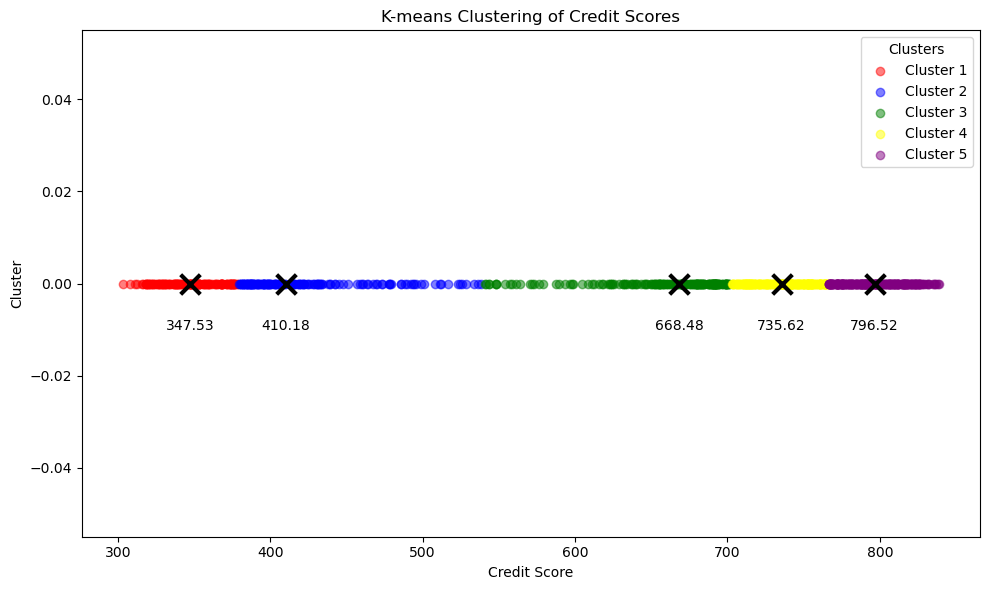

In [30]:
import matplotlib.pyplot as plt


# 绘制聚类结果
plt.figure(figsize=(10, 6))

# 计算聚类中心
centers = kmeans.cluster_centers_.flatten()

# 绘制每个数据点的散点图，并根据其聚类标签进行着色
colors = ['red', 'blue', 'green', 'yellow', 'purple']  # 假设有5个聚类
for i, color in enumerate(colors):
    plt.scatter(X[df['Credit_Rating'] == i]['Credit_Score'], [0] * len(X[df['Credit_Rating'] == i]['Credit_Score']), 
                label=f'Cluster {i+1}', color=color, alpha=0.5)

# 绘制聚类中心并标明横坐标
plt.scatter(centers, [0] * len(centers), c='black', marker='x', s=200, linewidths=3, zorder=3)
for i, center in enumerate(centers):
    plt.text(center, -0.01, f'{center:.2f}', ha='center')


# 设置图例
plt.legend(title='Clusters')

# 设置x轴标签和标题
plt.xlabel('Credit Score')
plt.ylabel('Cluster')
plt.title('K-means Clustering of Credit Scores')

plt.savefig('../Data/Q4_kmeans_credit_scores.png')
# 显示图形
plt.tight_layout()
plt.show()

d:\ProgramData\anaconda3\envs\pyTorchgpuEnv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\anaconda3\envs\pyTorchgpuEnv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\anaconda3\envs\pyTorchgpuEnv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


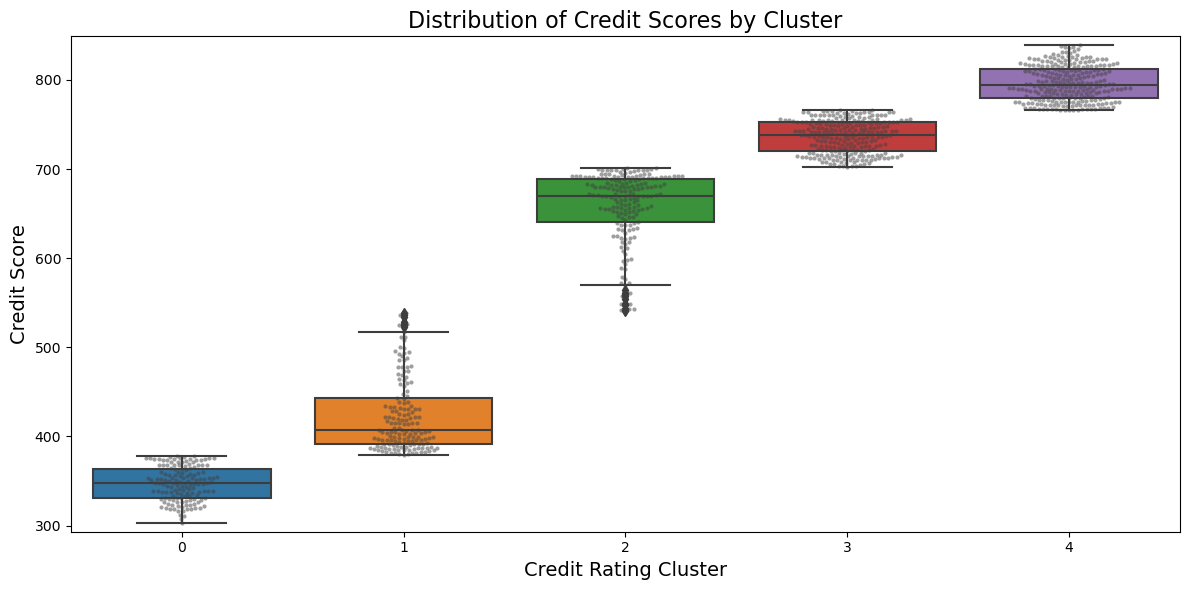

In [31]:
import seaborn as sns
# 创建一个新的图形
plt.figure(figsize=(12, 6))

# 使用seaborn绘制箱线图
sns.boxplot(x='Credit_Rating', y='Credit_Score', data=df)

# 添加标题和标签
plt.title('Distribution of Credit Scores by Cluster', fontsize=16)
plt.xlabel('Credit Rating Cluster', fontsize=14)
plt.ylabel('Credit Score', fontsize=14)

# 调整y轴的范围，使其更贴近数据
y_min = df['Credit_Score'].min() - 10
y_max = df['Credit_Score'].max() + 10
plt.ylim(y_min, y_max)

# 为每个箱子添加数据点的散点图
sns.swarmplot(x='Credit_Rating', y='Credit_Score', data=df, color=".25", size=3, alpha=0.5)

# 保存图形
plt.savefig('../Data/Q4_kmeans_credit_scores_boxplot.png', dpi=300, bbox_inches='tight')

# 显示图形
plt.tight_layout()
plt.show()


各信用等级的平均违约率：
Credit_Score
303.127718    1.0
307.779151    1.0
311.217650    1.0
312.370384    1.0
316.002719    1.0
316.597178    1.0
318.184085    1.0
318.535426    1.0
318.572425    1.0
318.723808    1.0
319.860670    1.0
319.990057    1.0
320.006791    1.0
320.548230    1.0
321.288474    1.0
321.594990    1.0
321.917080    1.0
322.685446    1.0
322.763353    1.0
323.218059    1.0
324.309359    1.0
324.685649    1.0
326.109042    1.0
326.562303    1.0
326.657136    1.0
326.764604    1.0
327.500824    1.0
328.165294    1.0
328.590389    1.0
329.102913    1.0
329.434396    1.0
329.477387    1.0
330.283802    1.0
330.675005    1.0
330.944006    1.0
331.364841    1.0
331.503711    1.0
332.699572    1.0
333.179603    1.0
333.508935    1.0
333.935110    1.0
335.725743    1.0
336.626706    1.0
336.925187    1.0
336.976956    1.0
337.611286    1.0
337.694729    1.0
337.820797    1.0
338.004156    1.0
338.637302    0.0
338.797164    1.0
338.915942    1.0
339.197795    1.0
339.310752    1.0
3

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2364\4259020504.py:12: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from current font.
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2364\4259020504.py:12: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2364\4259020504.py:12: UserWarning: Glyph 31561 (\N{CJK UNIFIED IDEOGRAPH-7B49}) missing from current font.
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2364\4259020504.py:12: UserWarning: Glyph 32423 (\N{CJK UNIFIED IDEOGRAPH-7EA7}) missing from current font.
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2364\4259020504.py:12: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2364\4259020504.py:12: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) miss

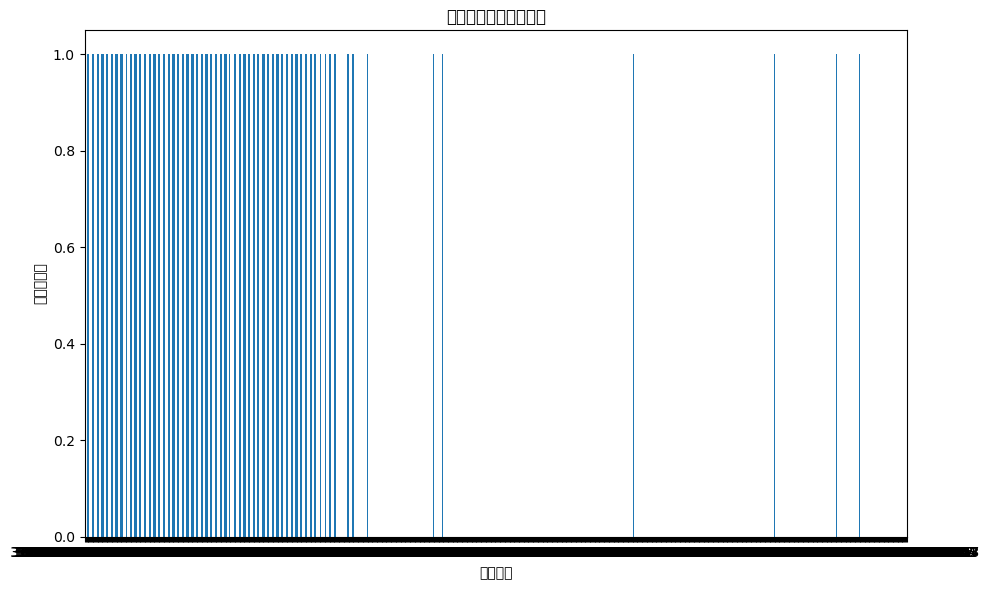

In [32]:
print("\n各信用等级的平均违约率：")
print(df.groupby('Credit_Score')['Y(1=default, 0=non-default)'].mean().sort_index())

# 可视化信用等级与违约率的关系
plt.figure(figsize=(10, 6))
df.groupby('Credit_Score')['Y(1=default, 0=non-default)'].mean().sort_index().plot(kind='bar')
plt.title('信用等级与违约率关系')
plt.xlabel('信用等级')
plt.ylabel('平均违约率')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()